# INM433 Visual Analytics: Coursework

### Libraries

In [189]:
import pandas as pd
import numpy as np

import plotly.express as px
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import folium as fm
from folium.plugins import HeatMap

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [190]:
# option for showing all the columns when head or describe methods are used
pd.set_option('display.max_columns', None)

# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

---

---

### Load the data

In [191]:
df_accidents_1 = pd.read_csv('data/dft-road-casualty-statistics-accident-2019.csv', parse_dates = ['date'], dayfirst = True)
df_accidents_2 = pd.read_csv('data/dft-road-casualty-statistics-accident-2020.csv', parse_dates = ['date'], dayfirst = True)
#df_accidents_3 = pd.read_csv('data/dft-road-casualty-statistics-accident-provisional-mid-year-unvalidated-2021.csv')

df_vehicles_1 = pd.read_csv('data/dft-road-casualty-statistics-vehicle-2019.csv')
df_vehicles_2 = pd.read_csv('data/dft-road-casualty-statistics-vehicle-2020.csv')
#df_vehicles_3 = pd.read_csv('data/dft-road-casualty-statistics-vehicle-provisional-mid-year-unvalidated-2021.csv')

df_casualty_1 = pd.read_csv('data/dft-road-casualty-statistics-casualty-2019.csv')
df_casualty_2 = pd.read_csv('data/dft-road-casualty-statistics-casualty-2020.csv')
#df_casualty_3 = pd.read_csv('data/dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2021.csv')

---

---

### Combine the data

In [192]:
df_accidents   = pd.concat([df_accidents_1, 
                            df_accidents_2, 
                            #df_accidents_3
                           ])

df_vehicles    = pd.concat([df_vehicles_1, 
                            df_vehicles_2, 
                            #df_vehicles_3
                           ])

df_casualties  = pd.concat([df_casualty_1, 
                           df_casualty_2, 
                           #df_vehicles_3
                           ])

df_accidents.reset_index(drop = True, inplace = True)
df_vehicles.reset_index(drop = True, inplace = True)
df_casualties.reset_index(drop = True, inplace = True)

---

---

### Check combined data frames

In [193]:
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208735 entries, 0 to 208734
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   accident_index                               208735 non-null  object        
 1   accident_year                                208735 non-null  int64         
 2   accident_reference                           208735 non-null  object        
 3   location_easting_osgr                        208693 non-null  float64       
 4   location_northing_osgr                       208693 non-null  float64       
 5   longitude                                    208693 non-null  float64       
 6   latitude                                     208693 non-null  float64       
 7   police_force                                 208735 non-null  int64         
 8   accident_severity                            208735 non-null  in

In [194]:
df_accidents.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2019010128300,2019,10128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,2019-02-18,2,17:50,1,E09000033,E09000033,3,4202,1,30,1,2,3,4202,0,5,1,1,1,0,0,1,3,2,E01004762
1,2019010152270,2019,10152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,2019-01-15,3,21:45,9,E09000022,E09000022,3,23,2,30,0,-1,-1,-1,9,9,4,1,1,0,0,1,3,2,E01003117
2,2019010155191,2019,10155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,2019-01-01,3,01:50,2,E09000007,E09000007,4,504,6,30,3,4,6,0,0,0,4,1,1,0,0,1,1,2,E01000943
3,2019010155192,2019,10155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,2019-01-01,3,01:20,2,E09000007,E09000007,4,510,6,20,3,4,4,510,0,0,4,1,1,0,0,1,1,2,E01000973
4,2019010155194,2019,10155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,2019-01-01,3,00:40,28,E09000005,E09000005,3,4003,6,30,6,4,6,0,0,0,4,1,1,0,0,1,1,2,E01000546


In [195]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383756 entries, 0 to 383755
Data columns (total 27 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   accident_index                    383756 non-null  object
 1   accident_year                     383756 non-null  int64 
 2   accident_reference                383756 non-null  object
 3   vehicle_reference                 383756 non-null  int64 
 4   vehicle_type                      383756 non-null  int64 
 5   towing_and_articulation           383756 non-null  int64 
 6   vehicle_manoeuvre                 383756 non-null  int64 
 7   vehicle_direction_from            383756 non-null  int64 
 8   vehicle_direction_to              383756 non-null  int64 
 9   vehicle_location_restricted_lane  383756 non-null  int64 
 10  junction_location                 383756 non-null  int64 
 11  skidding_and_overturning          383756 non-null  int64 
 12  hi

In [196]:
df_vehicles.head()

,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,2019010128300,2019,10128300,1,9,0,99,9,9,99,9,9,99,9,99,4,9,6,1,58,9,-1,-1,-1,-1,2,1
1,2019010128300,2019,10128300,2,9,0,99,9,9,99,9,9,99,9,99,9,9,6,3,-1,-1,-1,-1,-1,-1,2,1
2,2019010152270,2019,10152270,1,9,0,18,9,9,99,0,9,99,9,99,1,9,6,2,24,5,-1,-1,-1,-1,3,1
3,2019010152270,2019,10152270,2,9,0,18,9,9,99,0,9,99,9,99,9,9,6,3,-1,-1,-1,-1,-1,-1,6,1
4,2019010155191,2019,10155191,1,9,0,3,5,1,0,1,0,0,0,0,2,1,6,1,45,7,-1,-1,-1,-1,4,1


In [197]:
df_casualties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268742 entries, 0 to 268741
Data columns (total 18 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   accident_index                      268742 non-null  object
 1   accident_year                       268742 non-null  int64 
 2   accident_reference                  268742 non-null  object
 3   vehicle_reference                   268742 non-null  int64 
 4   casualty_reference                  268742 non-null  int64 
 5   casualty_class                      268742 non-null  int64 
 6   sex_of_casualty                     268742 non-null  int64 
 7   age_of_casualty                     268742 non-null  int64 
 8   age_band_of_casualty                268742 non-null  int64 
 9   casualty_severity                   268742 non-null  int64 
 10  pedestrian_location                 268742 non-null  int64 
 11  pedestrian_movement                 268

In [198]:
df_casualties.head()

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2019010128300,2019,10128300,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2
1,2019010128300,2019,10128300,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5
2,2019010128300,2019,10128300,1,3,2,2,-1,-1,3,0,0,2,0,0,9,1,5
3,2019010152270,2019,10152270,1,1,1,2,24,5,3,0,0,0,0,0,9,1,3
4,2019010155191,2019,10155191,2,1,2,2,21,5,3,0,0,0,0,0,1,1,1


#### Export for Tableau

In [199]:
df_accidents.to_csv('visualisation/OP0-accidents_uk.csv', index = False)

In [200]:
df_casualties.to_csv('visualisation/OP0-casualties_uk.csv', index = False)

---

---

### Data Preprocessing

#### Filter the data for London

Police force column is the broadest one. Use this to filter the data for London.

In [201]:
df_accidents_london = df_accidents[df_accidents['police_force'] == 1]
df_accidents_london.reset_index(drop = True, inplace = True)

In [202]:
df_accidents_london.shape

(45961, 36)

---

#### Round the hour of accident

So that it is rounded to the closest full hour.

In [203]:
# split hour and minute to separate columns
df_accidents_london["hour"] = df_accidents_london["time"].str.split(":").str.get(0).astype('int')
df_accidents_london["minute"] = df_accidents_london["time"].str.split(":").str.get(1).astype('int')

In [204]:
# create adder column
df_accidents_london['adder'] = np.where(df_accidents_london['minute'] >= 30, 1, 0)

In [205]:
# calculate hour_rounded
df_accidents_london['hour_rounded'] = df_accidents_london['hour'] + df_accidents_london['adder']

The date of accidents with the hour 23:XX, where XX >= 30 will be rounded to the next day.

In [206]:
df_accidents_london['date_rounded'] = np.where(np.logical_and(df_accidents_london['hour'] == 23, 
                                                              df_accidents_london['minute'] >= 30), 
                                               df_accidents_london['date'] + pd.DateOffset(1), 
                                               df_accidents_london['date'])

---

#### Add the day of week column

In [207]:
df_accidents_london['week_day'] = df_accidents_london['date_rounded'].dt.day_name()

#### Review & check new columns

In [208]:
df_accidents_london[['date','time','hour','minute','hour_rounded', 'date_rounded','week_day']].head(5)

,date,time,hour,minute,hour_rounded,date_rounded,week_day
0,2019-02-18,17:50,17,50,18,2019-02-18,Monday
1,2019-01-15,21:45,21,45,22,2019-01-15,Tuesday
2,2019-01-01,01:50,1,50,2,2019-01-01,Tuesday
3,2019-01-01,01:20,1,20,1,2019-01-01,Tuesday
4,2019-01-01,00:40,0,40,1,2019-01-01,Tuesday


---

#### Add location names to the data

In [209]:
df_local_authority_district = pd.read_excel('data/lookup_table.xlsx', sheet_name = 'local_authority_district')
df_local_authority_ons_district = pd.read_excel('data/lookup_table.xlsx', sheet_name = 'local_authority_ons_district')
df_local_authority_highway = pd.read_excel('data/lookup_table.xlsx', sheet_name = 'local_authority_highway')

In [210]:
df_accidents_london = df_accidents_london.merge(df_local_authority_district,
                                                how = 'left',
                                                on = 'local_authority_district')

df_accidents_london = df_accidents_london.merge(df_local_authority_ons_district,
                                                how = 'left',
                                                on = 'local_authority_ons_district')

df_accidents_london = df_accidents_london.merge(df_local_authority_highway,
                                                how = 'left',
                                                on = 'local_authority_highway')

---

#### Reverse accident severity values

Reverse accident severities so that 3 becomes Fatal and 1 becomes Slight.

In [211]:
# create a list of our conditions
conditions = [(df_accidents_london['accident_severity'] == 3),
              (df_accidents_london['accident_severity'] == 2),
              (df_accidents_london['accident_severity'] == 1)]

# create a list of the values we want to assign for each condition
values = [1, 2, 3]

# create a new column and use np.select to assign values to it using our lists as arguments
df_accidents_london['accident_severity_r'] = np.select(conditions, values)

In [212]:
df_accidents_london['accident_severity'] = df_accidents_london['accident_severity_r']
del df_accidents_london['accident_severity_r']

---

#### Reverse casualty severity values

Reverse casualty severities so that 3 becomes Fatal and 1 becomes Slight.

In [213]:
# create a list of our conditions
conditions = [(df_casualties['casualty_severity'] == 3),
              (df_casualties['casualty_severity'] == 2),
              (df_casualties['casualty_severity'] == 1)]

# create a list of the values we want to assign for each condition
values = [1, 2, 3]

# create a new column and use np.select to assign values to it using our lists as arguments
df_casualties['casualty_severity_r'] = np.select(conditions, values)

In [214]:
df_casualties['casualty_severity'] = df_casualties['casualty_severity_r']
del df_casualties['casualty_severity_r']

---

#### Export for Tableau

In [215]:
df_accidents_london.to_csv('visualisation/OP1-accidents_london.csv', index = False)

---

---

### Persona 1: Commuter Persona Analysis

#### Select the columns to be used in Commuter Persona Analysis

In [216]:
commuter_persona_columns = ['accident_index',
                            'accident_year',
                            'date_rounded',
                            'week_day',
                            'hour_rounded', 
                            'longitude',
                            'latitude',
                            'accident_severity', 
                            'number_of_vehicles',
                            'number_of_casualties', 
                            'local_authority_district_name', 
                            'local_authority_ons_district_name',
                            'local_authority_highway_name', 
                            'first_road_class', 
                            'first_road_number',
                            'road_type', 
                            'speed_limit', 
                            'junction_detail', 
                            'junction_control',
                            'second_road_class', 
                            'second_road_number'
                           ]

In [217]:
df_1 = df_accidents_london[commuter_persona_columns]

---

#### Filter data for commuting time period: weekdays & peak times

**Quieter times to travel**

On weekdays, it's generally quieter at the following times:

- On buses, between 08:30 and 15:00 and after 17:30

Source: https://tfl.gov.uk/status-updates/busiest-times-to-travel

In [218]:
# filter for weekdays
week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df_1 = df_1[(df_1['week_day'].isin(week_days))]

In [219]:
# define peak hours and create peak hour flag
df_1['peak_hour_flag'] = np.where(np.logical_or(np.logical_and(df_1['hour_rounded'] >= 7, df_1['hour_rounded'] <= 9), 
                                                np.logical_and(df_1['hour_rounded'] >= 16, df_1['hour_rounded'] <= 18)),
                                  "Yes", 
                                  "No")

# filter for peak hours
df_1 = df_1[df_1['peak_hour_flag'] == "Yes"]

In [220]:
# reset index
df_1.reset_index(level=[0], inplace=True, drop=True)

In [221]:
df_1.head()

,accident_index,accident_year,date_rounded,week_day,hour_rounded,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,local_authority_district_name,local_authority_ons_district_name,local_authority_highway_name,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,peak_hour_flag
0,2019010128300,2019,2019-02-18,Monday,18,-0.153842,51.508057,1,2,3,Westminster,Westminster,Westminster,3,4202,1,30,1,2,3,4202,Yes
1,2019010155234,2019,2019-01-01,Tuesday,8,0.048712,51.547165,1,2,1,Newham,Newham,Newham,3,117,3,30,7,2,6,0,Yes
2,2019010155256,2019,2019-01-01,Tuesday,8,-0.149195,51.481194,1,2,1,Wandsworth,Wandsworth,Wandsworth,3,3216,6,30,0,-1,-1,-1,Yes
3,2019010155276,2019,2019-01-01,Tuesday,17,-0.279706,51.548898,2,2,1,Brent,Brent,Brent,3,404,6,30,3,4,3,404,Yes
4,2019010155282,2019,2019-01-01,Tuesday,18,-0.018574,51.522863,2,2,1,Tower Hamlets,Tower Hamlets,Tower Hamlets,5,0,6,20,0,-1,-1,-1,Yes


---

#### Add to_work and to_home identifier column

In [222]:
# create a list of our conditions
conditions = [((df_1['hour_rounded'] >= 7)  & (df_1['hour_rounded'] <= 9)),
              ((df_1['hour_rounded'] >= 16) & (df_1['hour_rounded'] <= 18))
             ]

# create a list of the values we want to assign for each condition
values = ['to_work', 'to_home']

# create a new column and use np.select to assign values to it using our lists as arguments
df_1['direction'] = np.select(conditions, values)

In [223]:
df_1.head()

,accident_index,accident_year,date_rounded,week_day,hour_rounded,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,local_authority_district_name,local_authority_ons_district_name,local_authority_highway_name,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,peak_hour_flag,direction
0,2019010128300,2019,2019-02-18,Monday,18,-0.153842,51.508057,1,2,3,Westminster,Westminster,Westminster,3,4202,1,30,1,2,3,4202,Yes,to_home
1,2019010155234,2019,2019-01-01,Tuesday,8,0.048712,51.547165,1,2,1,Newham,Newham,Newham,3,117,3,30,7,2,6,0,Yes,to_work
2,2019010155256,2019,2019-01-01,Tuesday,8,-0.149195,51.481194,1,2,1,Wandsworth,Wandsworth,Wandsworth,3,3216,6,30,0,-1,-1,-1,Yes,to_work
3,2019010155276,2019,2019-01-01,Tuesday,17,-0.279706,51.548898,2,2,1,Brent,Brent,Brent,3,404,6,30,3,4,3,404,Yes,to_home
4,2019010155282,2019,2019-01-01,Tuesday,18,-0.018574,51.522863,2,2,1,Tower Hamlets,Tower Hamlets,Tower Hamlets,5,0,6,20,0,-1,-1,-1,Yes,to_home


In [224]:
df_1['hour_rounded'].value_counts()

18    3073
17    2794
16    2531
9     2318
8     2246
7     1215
Name: hour_rounded, dtype: int64

---

#### Filter data for the accidents that involves bicycles and cars only

In [225]:
df_vehicles_commuters = df_vehicles[np.logical_or(df_vehicles['vehicle_type'] == 1, 
                                                  df_vehicles['vehicle_type'] == 9)]

df_vehicles_commuters.reset_index(drop = True, inplace = True)

In [226]:
df_vehicles_commuters['commuter'] = np.where(df_vehicles_commuters['vehicle_type'] == 1,
                                             "Cyclist", 
                                             "Driver")

In [227]:
df_vehicles_commuters_cyclist = df_vehicles_commuters[df_vehicles_commuters['commuter'] == "Cyclist"]
df_vehicles_commuters_cyclist.reset_index(level=[0], inplace=True, drop=True)
df_vehicles_commuters_cyclist_sl = df_vehicles_commuters_cyclist[['accident_index','commuter']]
df_vehicles_commuters_cyclist_sl.drop_duplicates(subset = ['accident_index'], inplace = True)
df_vehicles_commuters_cyclist_sl.reset_index(level=[0], inplace=True, drop=True)

In [228]:
df_vehicles_commuters_driver = df_vehicles_commuters[df_vehicles_commuters['commuter'] == "Driver"]
df_vehicles_commuters_driver.reset_index(level=[0], inplace=True, drop=True)
df_vehicles_commuters_driver_sl = df_vehicles_commuters_driver[['accident_index','commuter']]
df_vehicles_commuters_driver_sl.drop_duplicates(subset = ['accident_index'], inplace = True)
df_vehicles_commuters_driver_sl.reset_index(level=[0], inplace=True, drop=True)

In [229]:
df_1_cyclist = df_1.copy()
df_1_cyclist = df_1_cyclist.merge(df_vehicles_commuters_cyclist_sl, how = 'inner', on = 'accident_index')
df_1_cyclist.shape

(3666, 24)

In [230]:
df_1_driver = df_1.copy()
df_1_driver = df_1_driver.merge(df_vehicles_commuters_driver_sl, how = 'inner', on = 'accident_index')
df_1_driver.shape

(9988, 24)

---

#### Perform DBSCAN based on location

Do this for the districts with the highest accident frequency to identify safer routes in these districts.

##### DBSCAN for drivers

##### - Identify the districts with the highest accident frequency

In [231]:
df_1_driver.head(3)

,accident_index,accident_year,date_rounded,week_day,hour_rounded,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,local_authority_district_name,local_authority_ons_district_name,local_authority_highway_name,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,peak_hour_flag,direction,commuter
0,2019010128300,2019,2019-02-18,Monday,18,-0.153842,51.508057,1,2,3,Westminster,Westminster,Westminster,3,4202,1,30,1,2,3,4202,Yes,to_home,Driver
1,2019010155234,2019,2019-01-01,Tuesday,8,0.048712,51.547165,1,2,1,Newham,Newham,Newham,3,117,3,30,7,2,6,0,Yes,to_work,Driver
2,2019010155256,2019,2019-01-01,Tuesday,8,-0.149195,51.481194,1,2,1,Wandsworth,Wandsworth,Wandsworth,3,3216,6,30,0,-1,-1,-1,Yes,to_work,Driver


In [232]:
df_1_driver.local_authority_district_name.value_counts(normalize = True).head()

Enfield       0.045568
Lambeth       0.045468
Croydon       0.045268
Wandsworth    0.042464
Brent         0.040160
Name: local_authority_district_name, dtype: float64

##### - Perform the clustering for these areas

In [233]:
# filter data for districts
districts = ['Enfield', 'Lambeth', 'Croydon']
df_1_driver_dst = df_1_driver[(df_1_driver['local_authority_district_name'].isin(districts))]
df_1_driver_dst.reset_index(drop = True, inplace = True)

# select features
df_1_driver_dst_ft = df_1_driver_dst[['longitude', 'latitude']]

# perform DBSCAN
dbscan1 = DBSCAN(eps = 0.0051, min_samples = 15)
dbscan1.fit(df_1_driver_dst_ft)

# merge cluster labels and modify df for visualisation
df_1_driver_dst['DBSCAN_labels'] = dbscan1.labels_ 
df_1_driver_dst['DBSCAN_labels_str'] = "C" + df_1_driver_dst['DBSCAN_labels'].astype('str')
df_1_driver_dst['DBSCAN_labels_str_c'] = np.where(df_1_driver_dst['DBSCAN_labels_str'] == 'C-1', 'Noise', df_1_driver_dst['DBSCAN_labels_str'])

# check value count of clusters
df_1_driver_dst.DBSCAN_labels_str_c.value_counts()

Noise    838
C0       146
C1       122
C2        49
C6        31
C7        26
C4        23
C3        21
C5        17
C8        17
C11       16
C9        15
C12       15
C10       15
C13       10
Name: DBSCAN_labels_str_c, dtype: int64

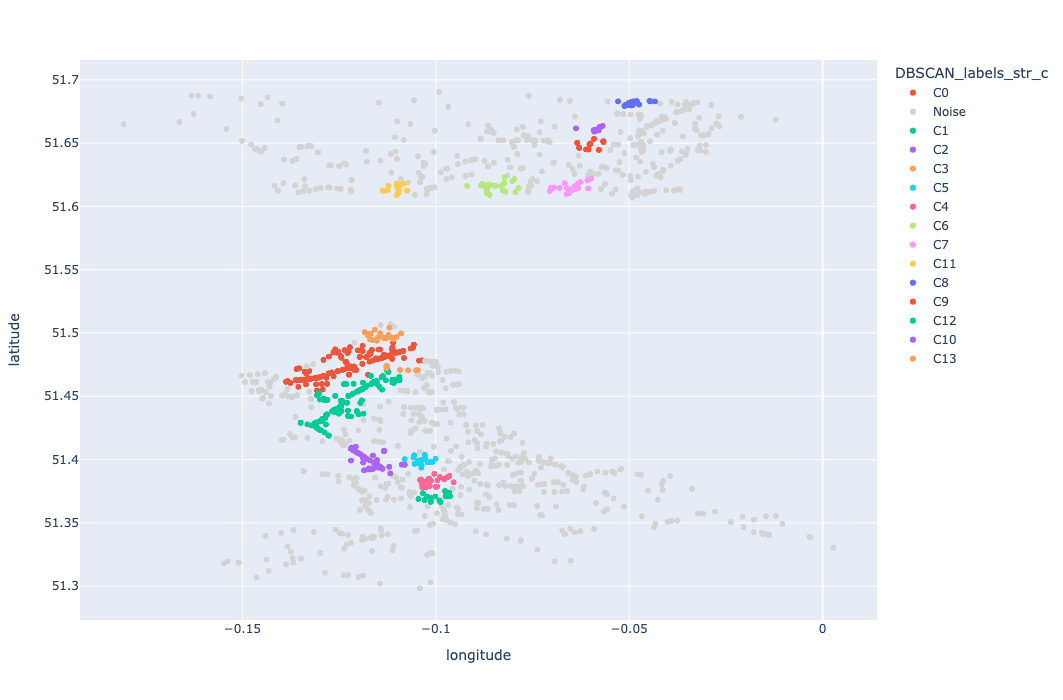

In [234]:
# visualise clusters 
fig = px.scatter(df_1_driver_dst, 
                 x = "longitude", 
                 y = "latitude",
                 width = 1300,
                 height = 700,
                 color = 'DBSCAN_labels_str_c',
                 color_discrete_map = {"Noise":"lightgray"}
                 )

fig.show()

##### - Optimize the epsilon and number of samples

Calculate the average distance between each point in the data set and its 15 nearest neighbors (my selected MinPts value).

In [235]:
neighbors = NearestNeighbors(n_neighbors = 15)
neighbors_fit = neighbors.fit(df_1_driver_dst_ft)
distances, indices = neighbors_fit.kneighbors(df_1_driver_dst_ft)

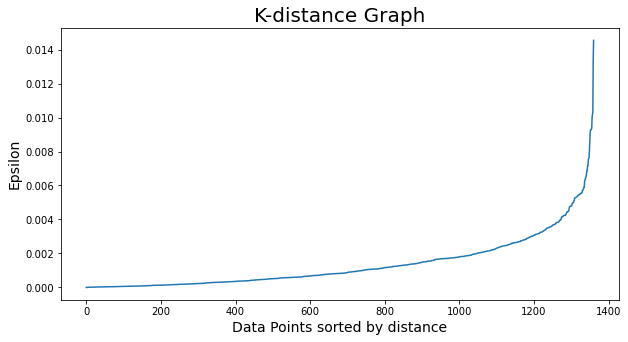

In [236]:
distances = np.sort(distances, axis = 0)
distances = distances[:, 1]

plt.figure(figsize = (10, 5))
plt.plot(distances)
plt.title('K-distance Graph',fontsize = 20)
plt.xlabel('Data Points sorted by distance',fontsize = 14)
plt.ylabel('Epsilon',fontsize = 14)
plt.show()

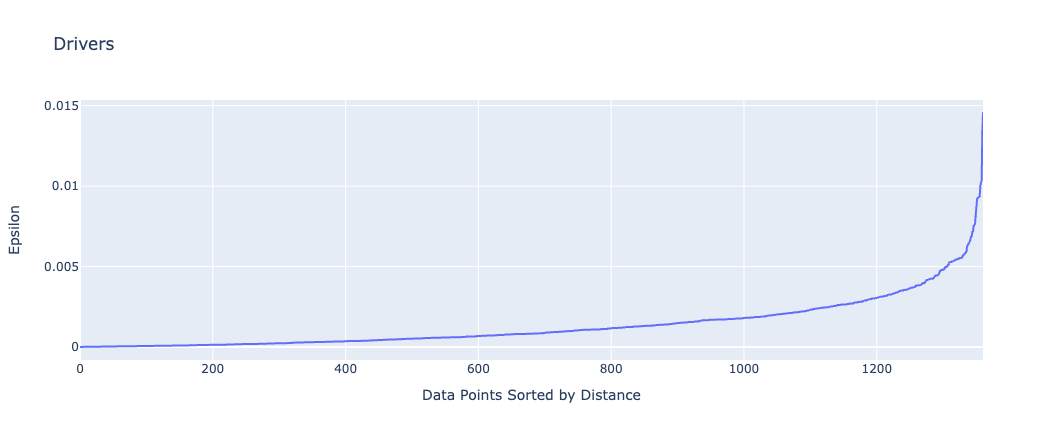

In [237]:
df_distances = pd.DataFrame(distances)
df_distances.reset_index(inplace = True)
df_distances.rename(columns = {"index":"Data Points Sorted by Distance", 0:"Epsilon"}, inplace = True)

fig = px.line(df_distances, 
              x = "Data Points Sorted by Distance", 
              y = "Epsilon",
              width = 800,
              height = 440,
              title = "Drivers"
              )

fig.show()

##### DBSCAN for cyclists

##### - Identify the districts with the highest accident frequency

In [238]:
df_1_cyclist.head(3)

,accident_index,accident_year,date_rounded,week_day,hour_rounded,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,local_authority_district_name,local_authority_ons_district_name,local_authority_highway_name,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,peak_hour_flag,direction,commuter
0,2019010155282,2019,2019-01-01,Tuesday,18,-0.018574,51.522863,2,2,1,Tower Hamlets,Tower Hamlets,Tower Hamlets,5,0,6,20,0,-1,-1,-1,Yes,to_home,Cyclist
1,2019010155306,2019,2019-01-01,Tuesday,18,-0.028530,51.569029,1,2,1,Waltham Forest,Waltham Forest,Waltham Forest,3,104,6,20,8,4,6,0,Yes,to_home,Cyclist
2,2019010155449,2019,2019-01-02,Wednesday,16,-0.169303,51.426780,1,2,1,Wandsworth,Wandsworth,Wandsworth,3,24,6,30,3,4,6,0,Yes,to_home,Cyclist


In [239]:
df_1_cyclist.local_authority_district_name.value_counts(normalize = True).head()

Southwark        0.079443
Lambeth          0.075348
Wandsworth       0.072891
Westminster      0.071253
Tower Hamlets    0.058695
Name: local_authority_district_name, dtype: float64

##### - Perform the clustering for these areas

In [240]:
# filter data for districts
districts = ['Southwark', 'Lambeth', 'Wandsworth']
df_1_cyclist_dst = df_1_cyclist[(df_1_cyclist['local_authority_district_name'].isin(districts))]
df_1_cyclist_dst.reset_index(drop = True, inplace = True)

# select features
df_1_cyclist_dst_ft = df_1_cyclist_dst[['longitude', 'latitude']]

# perform DBSCAN
dbscan1 = DBSCAN(eps = 0.0048, min_samples = 15)
dbscan1.fit(df_1_cyclist_dst_ft)

# merge cluster labels and modify df for visualisation
df_1_cyclist_dst['DBSCAN_labels'] = dbscan1.labels_ 
df_1_cyclist_dst['DBSCAN_labels_str'] = "C" + df_1_cyclist_dst['DBSCAN_labels'].astype('str')
df_1_cyclist_dst['DBSCAN_labels_str_c'] = np.where(df_1_cyclist_dst['DBSCAN_labels_str'] == 'C-1', 'Noise', df_1_cyclist_dst['DBSCAN_labels_str'])

# check value count of clusters
df_1_cyclist_dst.DBSCAN_labels_str_c.value_counts()

Noise    529
C1        87
C2        61
C4        43
C0        29
C3        27
C5        22
C7        18
C6        15
C8         3
Name: DBSCAN_labels_str_c, dtype: int64

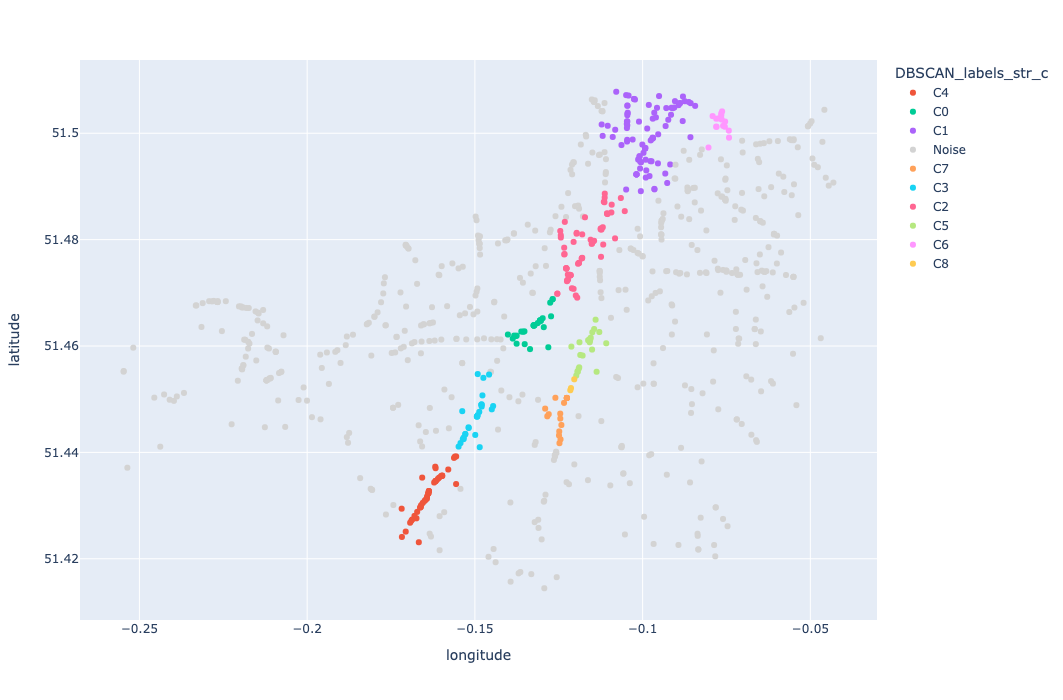

In [241]:
# visualise clusters 
fig = px.scatter(df_1_cyclist_dst, 
                 x = "longitude", 
                 y = "latitude",
                 width = 1300,
                 height = 700,
                 color = 'DBSCAN_labels_str_c',
                 color_discrete_map = {"Noise":"lightgray"}
                 )

fig.show()

##### - Optimize the epsilon and number of samples

Calculate the average distance between each point in the data set and its 15 nearest neighbors (my selected MinPts value).

In [242]:
neighbors = NearestNeighbors(n_neighbors = 15)
neighbors_fit = neighbors.fit(df_1_cyclist_dst_ft)
distances, indices = neighbors_fit.kneighbors(df_1_cyclist_dst_ft)

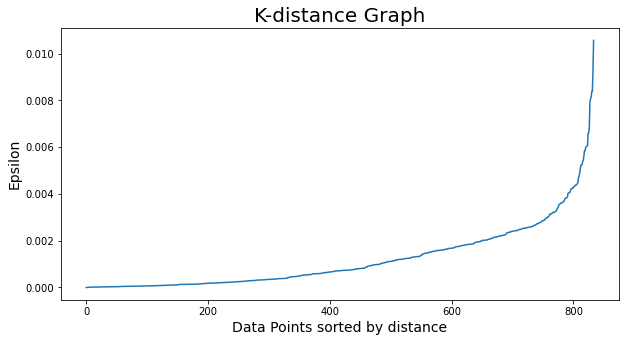

In [243]:
distances = np.sort(distances, axis = 0)
distances = distances[:, 1]

plt.figure(figsize = (10, 5))
plt.plot(distances)
plt.title('K-distance Graph',fontsize = 20)
plt.xlabel('Data Points sorted by distance',fontsize = 14)
plt.ylabel('Epsilon',fontsize = 14)
plt.show()

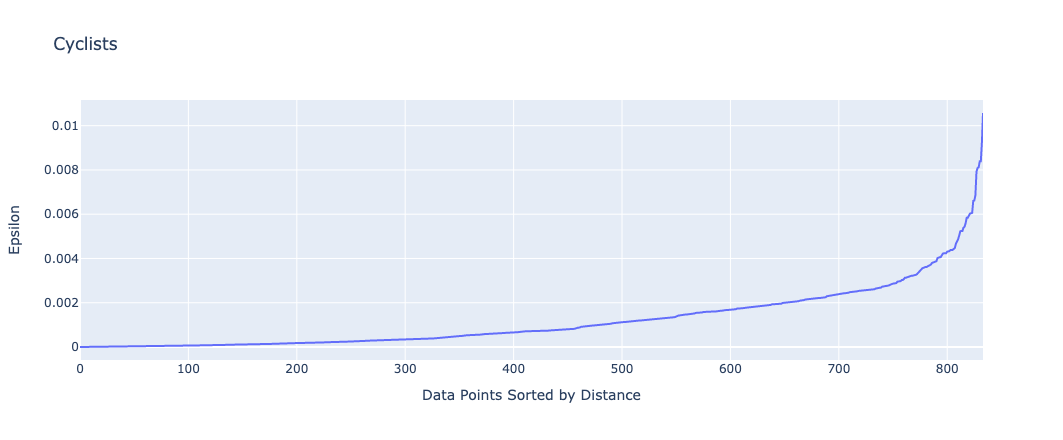

In [244]:
df_distances = pd.DataFrame(distances)
df_distances.reset_index(inplace = True)
df_distances.rename(columns = {"index":"Data Points Sorted by Distance", 0:"Epsilon"}, inplace = True)

fig = px.line(df_distances, 
              x = "Data Points Sorted by Distance", 
              y = "Epsilon",
              width = 800,
              height = 440,
              title = "Cyclists"
              )

fig.show()

---

#### Export for Tableau

In [245]:
df_1_cyclist.to_csv('visualisation/OP2.1-accidents_london_cyclist.csv', index = False)
df_1_driver.to_csv('visualisation/OP2.1-accidents_london_driver.csv', index = False)

---

#### Export for Tableau

In [246]:
df_1_cyclist_dst.to_csv('visualisation/OP2.2-accidents_london_cyclist_cl.csv', index = False)
df_1_driver_dst.to_csv('visualisation/OP2.2-accidents_london_driver_cl.csv', index = False)

---

---

### Persona 2: Health Authority Persona Analysis

#### Select the columns to be used in Health Authority Persona Analysis

In [247]:
health_a_persona_columns = ['accident_index',
                            'accident_year',
                            'date_rounded',
                            'week_day',
                            'hour_rounded', 
                            'longitude',
                            'latitude',
                            'accident_severity', 
                            'number_of_vehicles',
                            'number_of_casualties', 
                            'local_authority_district_name', 
                            'local_authority_ons_district_name',
                            'local_authority_highway_name', 
                            'first_road_class', 
                            'first_road_number',
                            'road_type', 
                            'speed_limit', 
                            'junction_detail', 
                            'junction_control',
                            'second_road_class', 
                            'second_road_number'
                           ]

In [248]:
df_2 = df_accidents_london[health_a_persona_columns]

In [249]:
df_2.shape

(45961, 21)

---

#### Drop the row containing Heatrow Airport

In [250]:
# exclude rows containing different strings
#df_2 = df_2[df_2["local_authority_district_name"].str.contains("London Airport (Heathrow)") == False]

df_2 = df_2[df_2.local_authority_district_name != 'London Airport (Heathrow)']


df_2.reset_index(drop = True, inplace = True)

In [251]:
df_2.shape

(45916, 21)

In [252]:
df_2[df_2['local_authority_district_name'] == 'London Airport (Heathrow)'].shape

(0, 21)

---

#### Calculate average casualty severity for every accident in casualty data

In [253]:
df_casualties.head(3)

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2019010128300,2019,10128300,1,1,1,1,58,9,1,0,0,0,0,0,9,1,2
1,2019010128300,2019,10128300,1,2,2,2,-1,-1,1,0,0,1,0,0,9,1,5
2,2019010128300,2019,10128300,1,3,2,2,-1,-1,1,0,0,2,0,0,9,1,5


In [254]:
df_casualties_g = df_casualties.groupby(["accident_index"]).agg({'casualty_severity':['mean']})
df_casualties_g.columns = df_casualties_g.columns.droplevel(1)
df_casualties_g.reset_index(level = [0], inplace = True)

In [255]:
df_casualties_g.head()

,accident_index,casualty_severity
0,2019010128300,1.0
1,2019010152270,1.0
2,2019010155191,1.0
3,2019010155192,2.0
4,2019010155194,1.0


---

#### Merge average casualty severity to accident data

In [256]:
df_2.shape

(45916, 21)

In [257]:
df_2_m = df_2.merge(df_casualties_g, how = 'left', on = 'accident_index')

In [258]:
df_2_m.shape

(45916, 22)

---

#### Calculate average casualty severity by district

In [259]:
# create identical columns for groupby function - it replaces columns when the column name is the same
df_2_m['lat_min'] = df_2_m['latitude']
df_2_m['lat_max'] = df_2_m['latitude']
df_2_m['lon_min'] = df_2_m['longitude']
df_2_m['lon_max'] = df_2_m['longitude']

df_2_m_g = df_2_m.groupby(["local_authority_district_name"]).agg({'casualty_severity':['mean'],
                                                                  'lat_min':['min'],
                                                                  'lat_max':['max'],
                                                                  'lon_min':['min'],
                                                                  'lon_max':['max']})

df_2_m_g.columns = df_2_m_g.columns.droplevel(1)
df_2_m_g.reset_index(level = [0], inplace = True)

# calculate coordinate midpoint for every district
df_2_m_g['latitude'] = (df_2_m_g['lat_min'] + df_2_m_g['lat_max']) / 2
df_2_m_g['longitude'] = (df_2_m_g['lon_min'] + df_2_m_g['lon_max']) / 2

# drop unnecessary columns
del df_2_m_g['lat_min']
del df_2_m_g['lat_max']
del df_2_m_g['lon_min']
del df_2_m_g['lon_max']

In [260]:
df_2_m_g.head()

,local_authority_district_name,casualty_severity,latitude,longitude
0,Barking and Dagenham,1.127800,51.555757,0.123689
1,Barnet,1.157305,51.611098,-0.223126
2,Bexley,1.131360,51.459035,0.142049
3,Brent,1.147059,51.563013,-0.261437
4,Bromley,1.144158,51.365714,0.035395


In [261]:
df_2_m_g.casualty_severity.describe()

count    32.000000
mean      1.147866
std       0.018561
min       1.122059
25%       1.132823
50%       1.145974
75%       1.159130
max       1.202145
Name: casualty_severity, dtype: float64

---

#### Normalise average casualty severity

In [262]:
df_2_m_g['casualty_severity_n'] = (df_2_m_g['casualty_severity'] - df_2_m_g['casualty_severity'].min()) / (df_2_m_g['casualty_severity'].max() - df_2_m_g['casualty_severity'].min())
df_2_m['casualty_severity_n'] = (df_2_m['casualty_severity'] - df_2_m['casualty_severity'].min()) / (df_2_m['casualty_severity'].max() - df_2_m['casualty_severity'].min())

df_2_m_g['type'] = "Casualty"

In [263]:
df_2_m_g.casualty_severity_n.describe()

count    32.000000
mean      0.322240
std       0.231758
min       0.000000
25%       0.134404
50%       0.298617
75%       0.462885
max       1.000000
Name: casualty_severity_n, dtype: float64

In [264]:
df_2_m.casualty_severity_n.describe()

count    20890.000000
mean         0.073799
std          0.179182
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: casualty_severity_n, dtype: float64

---

#### Load london hospitals data frame and modify it

In [265]:
df_hospitals_london = pd.read_excel("data/hospitals_london_n.xlsx")

In [266]:
df_hospitals_london.shape

(95, 3)

In [267]:
df_hospitals_london.head(3)

,Hospital Name,Latitude,Longitude
0,BMI The Blackheath Hospital,51.463474,0.006279
1,BMI Hendon Hospital,51.593712,-0.224590
2,BMI The London Independent Hospital,51.520401,-0.046730


In [268]:
df_hospitals_london['size'] = 0.1
df_hospitals_london['size_normalised'] = 0.1

df_hospitals_london['type'] = "Hospital"

In [269]:
#df_hospitals_london_sl['Hospital beds (HC) N'] = (df_hospitals_london_sl['Hospital beds (HC)'] - df_hospitals_london_sl['Hospital beds (HC)'].min()) / (df_hospitals_london_sl['Hospital beds (HC)'].max() - df_hospitals_london_sl['Hospital beds (HC)'].min())

In [270]:
df_hospitals_london.head(3)

,Hospital Name,Latitude,Longitude,size,size_normalised,type
0,BMI The Blackheath Hospital,51.463474,0.006279,0.1,0.1,Hospital
1,BMI Hendon Hospital,51.593712,-0.224590,0.1,0.1,Hospital
2,BMI The London Independent Hospital,51.520401,-0.046730,0.1,0.1,Hospital


In [271]:
# rename columns for top to bottom concatenate
df_hospitals_london.rename(columns = {'Hospital Name':'local_authority_district_name',
                                         'size':'casualty_severity',
                                         'Latitude':'latitude',
                                         'Longitude':'longitude',
                                         'size_normalised':'casualty_severity_n'}, inplace = True)

---

#### Perform partition based clustering (k-means algorithm) based on location

##### Partition based clustering (k-means) on districts

##### - Finding optimum number of clusters

In [272]:
df_2_m_g.head()

,local_authority_district_name,casualty_severity,latitude,longitude,casualty_severity_n,type
0,Barking and Dagenham,1.127800,51.555757,0.123689,0.071692,Casualty
1,Barnet,1.157305,51.611098,-0.223126,0.440106,Casualty
2,Bexley,1.131360,51.459035,0.142049,0.116135,Casualty
3,Brent,1.147059,51.563013,-0.261437,0.312163,Casualty
4,Bromley,1.144158,51.365714,0.035395,0.275946,Casualty


In [273]:
df_2_m_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   local_authority_district_name  32 non-null     object 
 1   casualty_severity              32 non-null     float64
 2   latitude                       32 non-null     float64
 3   longitude                      32 non-null     float64
 4   casualty_severity_n            32 non-null     float64
 5   type                           32 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.6+ KB


In [274]:
# select coordinates only - we will perform clustering based on location information
df_2_m_g_ft = df_2_m_g[['latitude','longitude']]

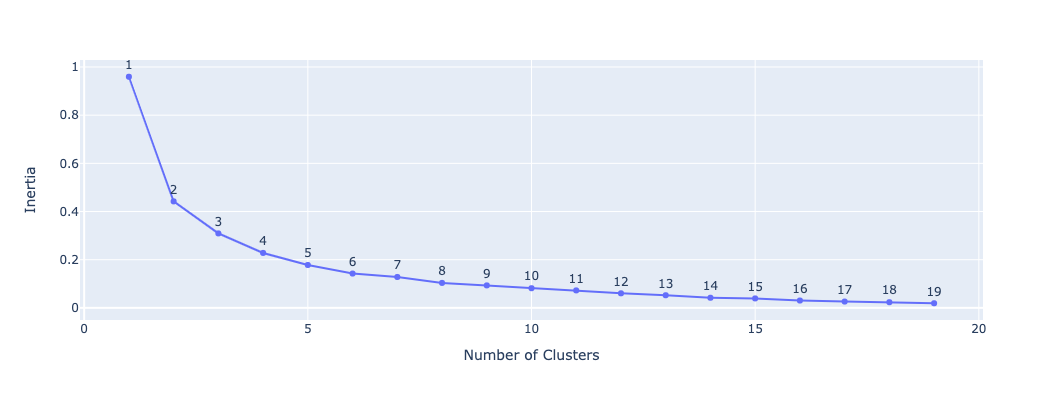

In [275]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1, 20):
    kmeans = KMeans(n_clusters = cluster, random_state = 4, init = 'k-means++')
    kmeans.fit(df_2_m_g_ft)
    SSE.append(kmeans.inertia_)
    
# converting the results into a dataframe and plotting them
df_inertia = pd.DataFrame({'Number of Clusters':range(1, 20), 'Inertia':SSE})

fig = px.line(df_inertia, 
              x = "Number of Clusters", 
              y = "Inertia",
              width = 800,
              height = 400,
              text = 'Number of Clusters'
              )

fig.update_traces(textposition = 'top center')

fig.show()

##### - Perform the clustering

In [276]:
# define number of clusters for districts
n_dist = 6

In [277]:
kmeans = KMeans(n_clusters = n_dist, random_state = 4, init = 'k-means++').fit(df_2_m_g_ft)

In [278]:
kmeans.labels_

array([1, 0, 1, 0, 3, 0, 3, 2, 4, 1, 4, 0, 4, 2, 1, 2, 2, 4, 0, 5, 3, 3,
       5, 1, 1, 2, 3, 5, 3, 4, 5, 0], dtype=int32)

In [279]:
# create cluster labels data frame
cluster_labels = pd.DataFrame(kmeans.labels_)
cluster_labels.rename(columns = {0:'cluster_labels_sep'}, inplace = True)

In [280]:
cluster_labels.head(3)

,cluster_labels_sep
0,1
1,0
2,1


In [281]:
# merge cluster labels to the main data frame
df_2_m_g_cl = pd.concat([df_2_m_g, cluster_labels], axis=1)

In [282]:
# convert cluster label to a column so that we can separate Casualty and Hospital
df_2_m_g_cl['cluster_labels_s'] = df_2_m_g_cl['type'] + df_2_m_g_cl['cluster_labels_sep'].astype('str')

In [283]:
df_2_m_g_cl.head()

,local_authority_district_name,casualty_severity,latitude,longitude,casualty_severity_n,type,cluster_labels_sep,cluster_labels_s
0,Barking and Dagenham,1.127800,51.555757,0.123689,0.071692,Casualty,1,Casualty1
1,Barnet,1.157305,51.611098,-0.223126,0.440106,Casualty,0,Casualty0
2,Bexley,1.131360,51.459035,0.142049,0.116135,Casualty,1,Casualty1
3,Brent,1.147059,51.563013,-0.261437,0.312163,Casualty,0,Casualty0
4,Bromley,1.144158,51.365714,0.035395,0.275946,Casualty,3,Casualty3


In [284]:
# Getting the centroid values
centroids = kmeans.cluster_centers_

print("\nCluster centroids:\n---")
print(centroids)


Cluster centroids:
---
[[ 5.15383258e+01 -2.02059250e-01]
 [ 5.15261627e+01  1.09977917e-01]
 [ 5.15135427e+01 -3.53138200e-01]
 [ 5.14366435e+01 -4.76972500e-02]
 [ 5.15861314e+01 -7.80751000e-02]
 [ 5.14015626e+01 -2.12191000e-01]]


In [285]:
# calculate the average casualty severity for every cluster
df_2_m_g_cl_g = df_2_m_g_cl.groupby(["cluster_labels_s"]).agg({'casualty_severity_n':['mean']})
df_2_m_g_cl_g.columns = df_2_m_g_cl_g.columns.droplevel(1)
df_2_m_g_cl_g.reset_index(level = [0], inplace = True)

In [286]:
df_2_m_g_cl_g

,cluster_labels_s,casualty_severity_n
0,Casualty0,0.379165
1,Casualty1,0.100377
2,Casualty2,0.285272
3,Casualty3,0.339596
4,Casualty4,0.277712
5,Casualty5,0.645489


In [287]:
df_2_m_g_cl_g.cluster_labels_s.unique()

array(['Casualty0', 'Casualty1', 'Casualty2', 'Casualty3', 'Casualty4',
       'Casualty5'], dtype=object)

In [288]:
# create a centraoid data frame
df_centroids_casu = pd.DataFrame(centroids, columns = ['latitude', 'longitude'])
df_centroids_casu['cluster_labels_s'] = ['Casualty0', 'Casualty1', 'Casualty2', 'Casualty3', 'Casualty4', 'Casualty5']

In [289]:
df_centroids_casu

,latitude,longitude,cluster_labels_s
0,51.538326,-0.202059,Casualty0
1,51.526163,0.109978,Casualty1
2,51.513543,-0.353138,Casualty2
3,51.436644,-0.047697,Casualty3
4,51.586131,-0.078075,Casualty4
5,51.401563,-0.212191,Casualty5


In [290]:
# merge average casualty severity by cluster to the centroid data frame
df_centroids_casu_m = df_centroids_casu.merge(df_2_m_g_cl_g, on = 'cluster_labels_s')

# add type column for facets
df_centroids_casu_m['type'] = "Casualty"

In [291]:
df_centroids_casu_m

,latitude,longitude,cluster_labels_s,casualty_severity_n,type
0,51.538326,-0.202059,Casualty0,0.379165,Casualty
1,51.526163,0.109978,Casualty1,0.100377,Casualty
2,51.513543,-0.353138,Casualty2,0.285272,Casualty
3,51.436644,-0.047697,Casualty3,0.339596,Casualty
4,51.586131,-0.078075,Casualty4,0.277712,Casualty
5,51.401563,-0.212191,Casualty5,0.645489,Casualty


##### Partition based clustering (k-means) on hospitals

##### - Finding optimum number of clusters

In [292]:
df_hospitals_london.head()

,local_authority_district_name,latitude,longitude,casualty_severity,casualty_severity_n,type
0,BMI The Blackheath Hospital,51.463474,0.006279,0.1,0.1,Hospital
1,BMI Hendon Hospital,51.593712,-0.224590,0.1,0.1,Hospital
2,BMI The London Independent Hospital,51.520401,-0.046730,0.1,0.1,Hospital
3,Priory Hospital Roehampton,51.462540,-0.251495,0.1,0.1,Hospital
4,Priory Hospital North London,51.630272,-0.120335,0.1,0.1,Hospital


In [293]:
df_hospitals_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   local_authority_district_name  95 non-null     object 
 1   latitude                       95 non-null     float64
 2   longitude                      95 non-null     float64
 3   casualty_severity              95 non-null     float64
 4   casualty_severity_n            95 non-null     float64
 5   type                           95 non-null     object 
dtypes: float64(4), object(2)
memory usage: 4.6+ KB


In [294]:
# select coordinates only - we will perform clustering based on location information
df_hospitals_london_ft = df_hospitals_london[['latitude','longitude']]

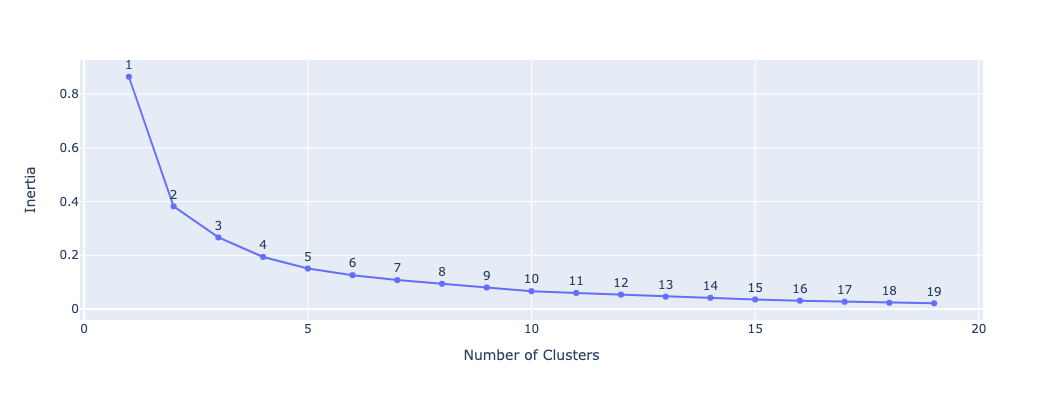

In [295]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1, 20):
    kmeans = KMeans(n_clusters = cluster, random_state = 4, init = 'k-means++')
    kmeans.fit(df_hospitals_london_ft)
    SSE.append(kmeans.inertia_)
    
# converting the results into a dataframe and plotting them
df_inertia = pd.DataFrame({'Number of Clusters':range(1, 20), 'Inertia':SSE})

fig = px.line(df_inertia, 
              x = "Number of Clusters", 
              y = "Inertia",
              width = 800,
              height = 400,
              text = 'Number of Clusters'
              )

fig.update_traces(textposition = 'top center')

fig.show()

##### - Perform the clustering

In [296]:
# define number of clusters for hospitals
n_hosp = 6

In [297]:
kmeans2 = KMeans(n_clusters = n_hosp, random_state = 4, init = 'k-means++').fit(df_hospitals_london_ft)

In [298]:
kmeans2.labels_

array([2, 5, 1, 3, 5, 0, 1, 2, 1, 1, 4, 2, 5, 5, 0, 4, 1, 0, 2, 0, 3, 1,
       5, 5, 0, 1, 2, 0, 0, 4, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 3, 3,
       3, 0, 2, 4, 2, 0, 3, 1, 3, 5, 0, 0, 0, 0, 4, 0, 5, 2, 4, 3, 5, 0,
       0, 4, 3, 2, 2, 2, 2, 0, 4, 4, 2, 3, 2, 5, 3, 1, 0, 0, 1, 0, 5, 0,
       0, 0, 1, 0, 0, 1, 0], dtype=int32)

In [299]:
# create cluster labels data frame
cluster_labels2 = pd.DataFrame(kmeans2.labels_)
cluster_labels2.rename(columns = {0:'cluster_labels_sep'}, inplace = True)

In [300]:
cluster_labels2.head(3)

,cluster_labels_sep
0,2
1,5
2,1


In [301]:
# merge cluster labels to the main data frame
df_hospitals_london_cl = pd.concat([df_hospitals_london, cluster_labels2], axis=1)

In [302]:
# convert cluster label to a column so that we can separate Casualty and Hospital
df_hospitals_london_cl['cluster_labels_s'] = df_hospitals_london_cl['type'] + df_hospitals_london_cl['cluster_labels_sep'].astype('str')

In [303]:
df_hospitals_london_cl.head()

,local_authority_district_name,latitude,longitude,casualty_severity,casualty_severity_n,type,cluster_labels_sep,cluster_labels_s
0,BMI The Blackheath Hospital,51.463474,0.006279,0.1,0.1,Hospital,2,Hospital2
1,BMI Hendon Hospital,51.593712,-0.224590,0.1,0.1,Hospital,5,Hospital5
2,BMI The London Independent Hospital,51.520401,-0.046730,0.1,0.1,Hospital,1,Hospital1
3,Priory Hospital Roehampton,51.462540,-0.251495,0.1,0.1,Hospital,3,Hospital3
4,Priory Hospital North London,51.630272,-0.120335,0.1,0.1,Hospital,5,Hospital5


In [304]:
# Getting the centroid values
centroids2 = kmeans2.cluster_centers_

print("\nCluster 2 centroids:\n---")
print(centroids2)


Cluster 2 centroids:
---
[[ 5.15101088e+01 -1.50009315e-01]
 [ 5.15075703e+01 -7.43048407e-02]
 [ 5.14849704e+01  2.95734434e-02]
 [ 5.14894638e+01 -2.42179877e-01]
 [ 5.15728103e+01 -4.08132121e-02]
 [ 5.15838117e+01 -1.69653616e-01]]


In [305]:
# calculate the count of hospitals for every cluster
df_hospitals_london_cl_g = df_hospitals_london_cl.groupby(["cluster_labels_s"]).agg({'casualty_severity_n':['count']})
df_hospitals_london_cl_g.columns = df_hospitals_london_cl_g.columns.droplevel(1)
df_hospitals_london_cl_g.reset_index(level = [0], inplace = True)

In [306]:
df_hospitals_london_cl_g

,cluster_labels_s,casualty_severity_n
0,Hospital0,35
1,Hospital1,14
2,Hospital2,14
3,Hospital3,12
4,Hospital4,9
5,Hospital5,11


In [307]:
df_hospitals_london_cl_g.cluster_labels_s.unique()

array(['Hospital0', 'Hospital1', 'Hospital2', 'Hospital3', 'Hospital4',
       'Hospital5'], dtype=object)

In [308]:
# create a centraoid data frame
df_centroids_hosp = pd.DataFrame(centroids2, columns = ['latitude', 'longitude'])
df_centroids_hosp['cluster_labels_s'] = ['Hospital0', 'Hospital1', 'Hospital2', 'Hospital3', 'Hospital4', 'Hospital5']

In [309]:
df_centroids_hosp

,latitude,longitude,cluster_labels_s
0,51.510109,-0.150009,Hospital0
1,51.507570,-0.074305,Hospital1
2,51.484970,0.029573,Hospital2
3,51.489464,-0.242180,Hospital3
4,51.572810,-0.040813,Hospital4
5,51.583812,-0.169654,Hospital5


In [310]:
# merge average casualty severity by cluster to the centroid data frame
df_centroids_hosp_m = df_centroids_hosp.merge(df_hospitals_london_cl_g, on = 'cluster_labels_s')

# add type column for facets
df_centroids_hosp_m['type'] = "Hospital"

In [311]:
# ADDITIONAL: normalize the count of hospitals in this one 
# so that they are in the same scale when we concatenate the data frames
df_centroids_hosp_m['casualty_severity_n_n'] = (df_centroids_hosp_m['casualty_severity_n'] - df_centroids_hosp_m['casualty_severity_n'].min()) / (df_centroids_hosp_m['casualty_severity_n'].max() - df_centroids_hosp_m['casualty_severity_n'].min())
df_centroids_hosp_m['casualty_severity_n'] = df_centroids_hosp_m['casualty_severity_n_n']
del df_centroids_hosp_m['casualty_severity_n_n']

In [312]:
df_centroids_hosp_m

,latitude,longitude,cluster_labels_s,casualty_severity_n,type
0,51.510109,-0.150009,Hospital0,1.000000,Hospital
1,51.507570,-0.074305,Hospital1,0.192308,Hospital
2,51.484970,0.029573,Hospital2,0.192308,Hospital
3,51.489464,-0.242180,Hospital3,0.115385,Hospital
4,51.572810,-0.040813,Hospital4,0.000000,Hospital
5,51.583812,-0.169654,Hospital5,0.076923,Hospital


---

#### Combine london hospitals and casualty severity by district data frame

In [313]:
df_2_cl = pd.concat([df_2_m_g_cl, df_hospitals_london_cl])
df_2_cl.reset_index(drop = True, inplace = True)

In [314]:
df_2_cl.head()

,local_authority_district_name,casualty_severity,latitude,longitude,casualty_severity_n,type,cluster_labels_sep,cluster_labels_s
0,Barking and Dagenham,1.127800,51.555757,0.123689,0.071692,Casualty,1,Casualty1
1,Barnet,1.157305,51.611098,-0.223126,0.440106,Casualty,0,Casualty0
2,Bexley,1.131360,51.459035,0.142049,0.116135,Casualty,1,Casualty1
3,Brent,1.147059,51.563013,-0.261437,0.312163,Casualty,0,Casualty0
4,Bromley,1.144158,51.365714,0.035395,0.275946,Casualty,3,Casualty3


In [315]:
# combine the centroid data frames as well
df_centroids_comb = pd.concat([df_centroids_casu_m, df_centroids_hosp_m])
df_centroids_comb.reset_index(drop = True, inplace = True)

In [316]:
df_centroids_comb

,latitude,longitude,cluster_labels_s,casualty_severity_n,type
0,51.538326,-0.202059,Casualty0,0.379165,Casualty
1,51.526163,0.109978,Casualty1,0.100377,Casualty
2,51.513543,-0.353138,Casualty2,0.285272,Casualty
3,51.436644,-0.047697,Casualty3,0.339596,Casualty
4,51.586131,-0.078075,Casualty4,0.277712,Casualty
5,51.401563,-0.212191,Casualty5,0.645489,Casualty
6,51.510109,-0.150009,Hospital0,1.000000,Hospital
7,51.507570,-0.074305,Hospital1,0.192308,Hospital
8,51.484970,0.029573,Hospital2,0.192308,Hospital
9,51.489464,-0.242180,Hospital3,0.115385,Hospital


##### Partition based clustering (k-means) on combined

##### - Finding optimum number of clusters

In [317]:
# select coordinates only - we will perform clustering based on location information
df_2_cl_ft = df_2_cl[['latitude','longitude']]

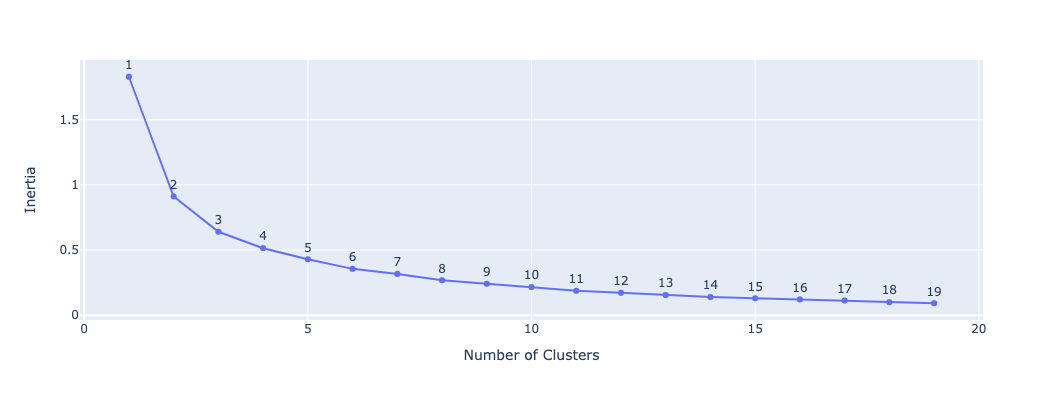

In [318]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1, 20):
    kmeans = KMeans(n_clusters = cluster, random_state = 4, init = 'k-means++')
    kmeans.fit(df_2_cl_ft)
    SSE.append(kmeans.inertia_)
    
# converting the results into a dataframe and plotting them
df_inertia = pd.DataFrame({'Number of Clusters':range(1, 20), 'Inertia':SSE})

fig = px.line(df_inertia, 
              x = "Number of Clusters", 
              y = "Inertia",
              width = 800,
              height = 400,
              text = 'Number of Clusters'
              )

fig.update_traces(textposition = 'top center')

fig.show()

##### - Perform the clustering

In [319]:
# define number of clusters for combined
n_comb = 6

In [320]:
kmeans3 = KMeans(n_clusters = n_comb, random_state = 4, init = 'k-means++').fit(df_2_cl_ft)

In [321]:
kmeans3.labels_

array([3, 1, 3, 5, 4, 1, 4, 5, 0, 3, 0, 2, 0, 5, 3, 5, 5, 0, 1, 2, 4, 4,
       2, 3, 3, 5, 4, 2, 0, 0, 2, 1, 4, 1, 0, 2, 0, 2, 0, 3, 0, 0, 0, 3,
       1, 1, 1, 0, 0, 1, 4, 2, 2, 4, 1, 1, 1, 0, 3, 1, 2, 0, 2, 2, 1, 1,
       1, 1, 1, 1, 4, 4, 0, 1, 2, 2, 2, 1, 3, 0, 3, 1, 2, 4, 2, 1, 1, 1,
       1, 1, 0, 1, 1, 3, 3, 2, 1, 1, 1, 0, 2, 4, 4, 4, 3, 1, 0, 0, 3, 5,
       3, 1, 5, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int32)

In [322]:
# create cluster labels data frame
cluster_labels3 = pd.DataFrame(kmeans3.labels_)
cluster_labels3.rename(columns = {0:'cluster_labels_cmb'}, inplace = True)

In [323]:
cluster_labels3.head(3)

,cluster_labels_cmb
0,3
1,1
2,3


In [324]:
# merge cluster labels to the main data frame
df_2_cl_cl = pd.concat([df_2_cl, cluster_labels3], axis=1)

In [325]:
# convert cluster label to a column so that we can separate Casualty and Hospital
df_2_cl_cl['cluster_labels_cmb_cat'] = "CmbCluster" + df_2_cl_cl['cluster_labels_cmb'].astype('str')

In [326]:
df_2_cl_cl.head()

,local_authority_district_name,casualty_severity,latitude,longitude,casualty_severity_n,type,cluster_labels_sep,cluster_labels_s,cluster_labels_cmb,cluster_labels_cmb_cat
0,Barking and Dagenham,1.127800,51.555757,0.123689,0.071692,Casualty,1,Casualty1,3,CmbCluster3
1,Barnet,1.157305,51.611098,-0.223126,0.440106,Casualty,0,Casualty0,1,CmbCluster1
2,Bexley,1.131360,51.459035,0.142049,0.116135,Casualty,1,Casualty1,3,CmbCluster3
3,Brent,1.147059,51.563013,-0.261437,0.312163,Casualty,0,Casualty0,5,CmbCluster5
4,Bromley,1.144158,51.365714,0.035395,0.275946,Casualty,3,Casualty3,4,CmbCluster4


In [327]:
df_2_cl_cl.groupby(["cluster_labels_cmb_cat", "type"]).agg({'cluster_labels_cmb_cat':['count'], 'casualty_severity_n':['mean']})

cluster_labels_cmb_cat casualty_severity_n
                                                 count                mean
cluster_labels_cmb_cat type                                               
CmbCluster0            Casualty                      6            0.254280
                       Hospital                     20            0.100000
CmbCluster1            Casualty                      4            0.419439
                       Hospital                     40            0.100000
CmbCluster2            Casualty                      5            0.573406
                       Hospital                     14            0.100000
CmbCluster3            Casualty                      6            0.100377
                       Hospital                     10            0.100000
CmbCluster4            Casualty                      5            0.380090
                       Hospital                      9            0.100000
CmbCluster5            Casualty                      6            0.289753
                       Hospital                      2            0.100000

In [328]:
# Getting the centroid values
centroids3 = kmeans3.cluster_centers_

print("\nCluster 3 centroids:\n---")
print(centroids3)


Cluster 3 centroids:
---
[[ 5.15522191e+01 -6.59897324e-02]
 [ 5.15342318e+01 -1.56522286e-01]
 [ 5.14628780e+01 -2.17094222e-01]
 [ 5.15151206e+01  7.13659027e-02]
 [ 5.14467370e+01 -4.84957551e-02]
 [ 5.15195938e+01 -3.24393106e-01]]


#### Create a new hazard measure

In [329]:
# derive a new emergency hazard measure:
# for every cluster, divide average casualty severity of a cluster by the number of hospitals in that cluster

df_m1 = df_2_cl_cl.groupby(["cluster_labels_cmb_cat", "type"]).agg({'casualty_severity_n':['mean']})
df_m1.columns = df_m1.columns.droplevel(1)
df_m1.reset_index(level = [0,1], inplace = True)
df_m1 = df_m1[df_m1['type'] == 'Casualty']
df_m1.reset_index(drop = True, inplace = True)

df_m1

,cluster_labels_cmb_cat,type,casualty_severity_n
0,CmbCluster0,Casualty,0.254280
1,CmbCluster1,Casualty,0.419439
2,CmbCluster2,Casualty,0.573406
3,CmbCluster3,Casualty,0.100377
4,CmbCluster4,Casualty,0.380090
5,CmbCluster5,Casualty,0.289753


In [330]:
df_m2 = df_2_cl_cl.groupby(["cluster_labels_cmb_cat", "type"]).agg({'casualty_severity_n':['count']})
df_m2.columns = df_m2.columns.droplevel(1)
df_m2.reset_index(level = [0,1], inplace = True)
df_m2 = df_m2[df_m2['type'] == 'Hospital']
df_m2.reset_index(drop = True, inplace = True)

df_m2

,cluster_labels_cmb_cat,type,casualty_severity_n
0,CmbCluster0,Hospital,20
1,CmbCluster1,Hospital,40
2,CmbCluster2,Hospital,14
3,CmbCluster3,Hospital,10
4,CmbCluster4,Hospital,9
5,CmbCluster5,Hospital,2


In [331]:
# merge two data frames
df_hazard = df_m1.merge(df_m2, on = 'cluster_labels_cmb_cat')

del df_hazard['type_x']
del df_hazard['type_y']

df_hazard['hazard'] = df_hazard['casualty_severity_n_x'] / df_hazard['casualty_severity_n_y']

del df_hazard['casualty_severity_n_x']
del df_hazard['casualty_severity_n_y']

df_hazard

,cluster_labels_cmb_cat,hazard
0,CmbCluster0,0.012714
1,CmbCluster1,0.010486
2,CmbCluster2,0.040958
3,CmbCluster3,0.010038
4,CmbCluster4,0.042232
5,CmbCluster5,0.144877


In [332]:
df_hazard.cluster_labels_cmb_cat.unique()

array(['CmbCluster0', 'CmbCluster1', 'CmbCluster2', 'CmbCluster3',
       'CmbCluster4', 'CmbCluster5'], dtype=object)

In [333]:
# create a centraoid data frame
df_centroids_cmb = pd.DataFrame(centroids3, columns = ['latitude', 'longitude'])
df_centroids_cmb['cluster_labels_cmb_cat'] = ['CmbCluster0', 'CmbCluster1', 'CmbCluster2', 'CmbCluster3', 'CmbCluster4', 'CmbCluster5']

In [334]:
df_centroids_cmb

,latitude,longitude,cluster_labels_cmb_cat
0,51.552219,-0.065990,CmbCluster0
1,51.534232,-0.156522,CmbCluster1
2,51.462878,-0.217094,CmbCluster2
3,51.515121,0.071366,CmbCluster3
4,51.446737,-0.048496,CmbCluster4
5,51.519594,-0.324393,CmbCluster5


In [335]:
# merge average casualty severity by cluster to the centroid data frame
df_centroids_cmb_m = df_centroids_cmb.merge(df_hazard, on = 'cluster_labels_cmb_cat')

In [336]:
df_centroids_cmb_m

,latitude,longitude,cluster_labels_cmb_cat,hazard
0,51.552219,-0.065990,CmbCluster0,0.012714
1,51.534232,-0.156522,CmbCluster1,0.010486
2,51.462878,-0.217094,CmbCluster2,0.040958
3,51.515121,0.071366,CmbCluster3,0.010038
4,51.446737,-0.048496,CmbCluster4,0.042232
5,51.519594,-0.324393,CmbCluster5,0.144877


---

#### Visualise clusters & centroids

##### District & Hospital Breakdown - Clusters

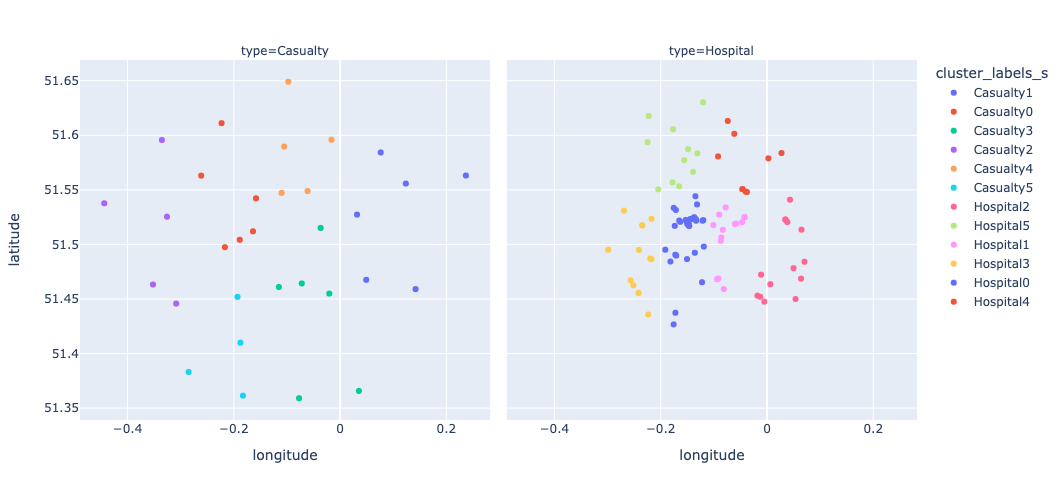

In [337]:
fig = px.scatter(df_2_cl, 
                 x = "longitude", 
                 y = "latitude",
                 width = 1300,
                 height = 500,
                 color = 'cluster_labels_s',
                 facet_col = 'type',
                 hover_data = ['cluster_labels_s'])

fig.show()

##### District & Hospital Breakdown - Centroids

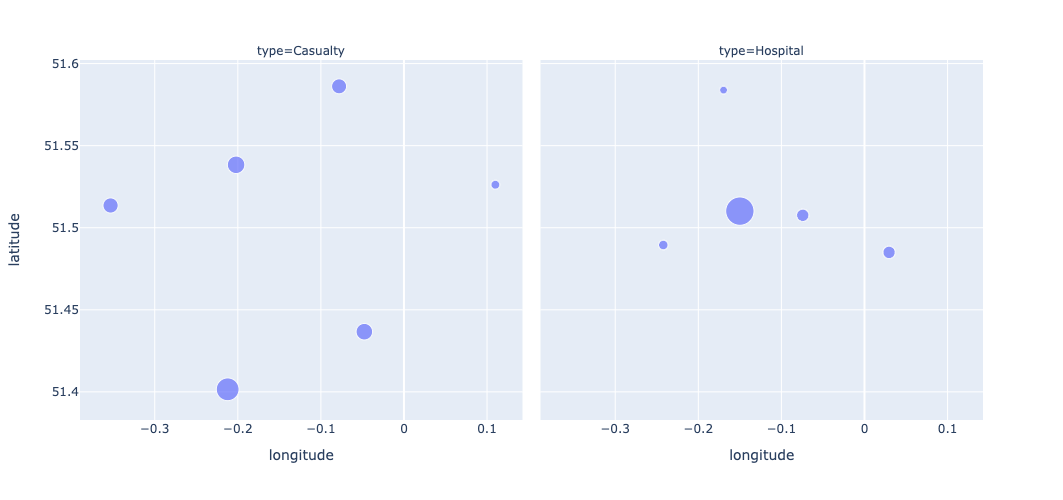

In [338]:
fig = px.scatter(df_centroids_comb, 
                 x = "longitude", 
                 y = "latitude",
                 width = 1300,
                 height = 500,
                 size = 'casualty_severity_n',
                 facet_col = 'type',
                 hover_data = ['cluster_labels_s'])

fig.show()

##### Combined - Clusters

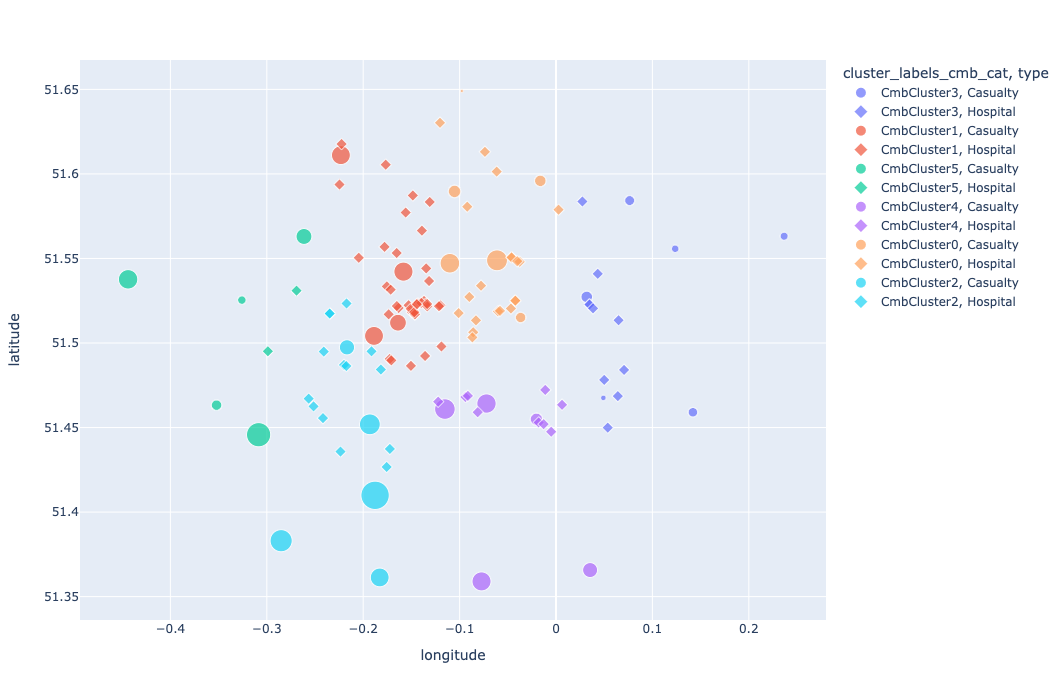

In [339]:
fig = px.scatter(df_2_cl_cl, 
                 x = "longitude", 
                 y = "latitude",
                 width = 1300,
                 height = 700,
                 color = 'cluster_labels_cmb_cat',
                 symbol = 'type',
                 size = 'casualty_severity_n',
                 hover_data = ['cluster_labels_cmb_cat']
                 )

fig.show()

##### Combined - Centroids

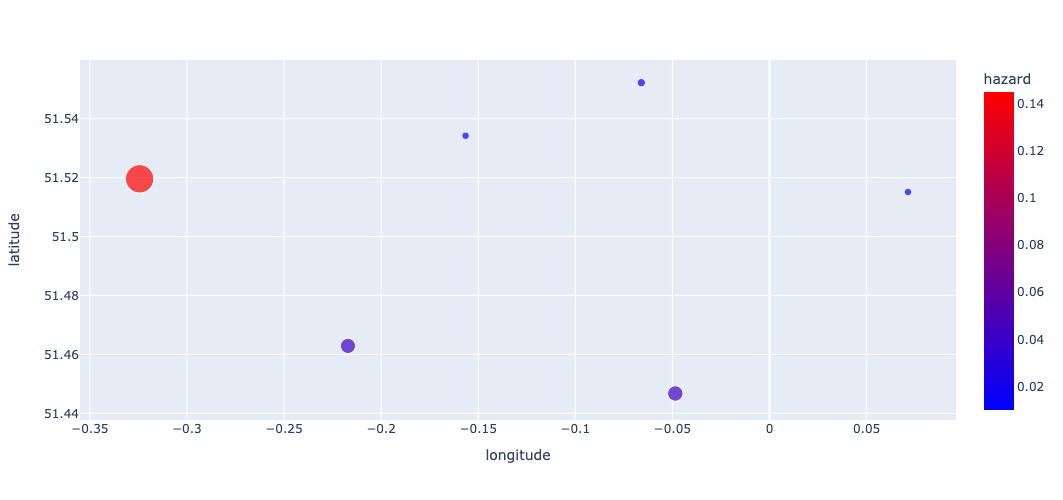

In [340]:
fig = px.scatter(df_centroids_cmb_m, 
                 x = "longitude", 
                 y = "latitude",
                 width = 800,
                 height = 500,
                 color = 'hazard',
                 size = 'hazard',
                 color_continuous_scale = 'Bluered'
                 )

fig.show()

---

#### Merge cluster labels into accident data frame

In [341]:
df_2_cl_cl_flt = df_2_cl_cl[df_2_cl_cl['type'] == "Casualty"]
df_2_cl_cl_flt.reset_index(drop = True, inplace = True)

df_cluster_labels_cmb_cat = df_2_cl_cl_flt[['local_authority_district_name', 'cluster_labels_cmb_cat']]

In [342]:
df_2_m = df_2_m.merge(df_cluster_labels_cmb_cat, how = 'left', on = 'local_authority_district_name')

In [343]:
df_2_m.cluster_labels_cmb_cat.value_counts()

CmbCluster0    9619
CmbCluster4    8893
CmbCluster5    7649
CmbCluster3    7205
CmbCluster1    7080
CmbCluster2    5450
Name: cluster_labels_cmb_cat, dtype: int64

In [344]:
df_2_m.head(3)

,accident_index,accident_year,date_rounded,week_day,hour_rounded,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,local_authority_district_name,local_authority_ons_district_name,local_authority_highway_name,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,casualty_severity,lat_min,lat_max,lon_min,lon_max,casualty_severity_n,cluster_labels_cmb_cat
0,2019010128300,2019,2019-02-18,Monday,18,-0.153842,51.508057,1,2,3,Westminster,Westminster,Westminster,3,4202,1,30,1,2,3,4202,1.0,51.508057,51.508057,-0.153842,-0.153842,0.0,CmbCluster1
1,2019010152270,2019,2019-01-15,Tuesday,22,-0.127949,51.436208,1,2,1,Lambeth,Lambeth,Lambeth,3,23,2,30,0,-1,-1,-1,1.0,51.436208,51.436208,-0.127949,-0.127949,0.0,CmbCluster4
2,2019010155191,2019,2019-01-01,Tuesday,2,-0.124193,51.526795,1,2,1,Camden,Camden,Camden,4,504,6,30,3,4,6,0,1.0,51.526795,51.526795,-0.124193,-0.124193,0.0,CmbCluster1


---

#### Export for Tableau

In [345]:
df_2_cl_cl.to_csv('visualisation/OP3.1-casualty_severity_by_district.csv', index = False)

df_2_m.to_csv('visualisation/OP3.2-casualty_severity_by_accident.csv', index = False)

df_centroids_cmb_m.to_csv('visualisation/OP3.3-centroids.csv', index = False)

---

#### Look at final data frames

In [346]:
df_2_cl_cl.head(2)

,local_authority_district_name,casualty_severity,latitude,longitude,casualty_severity_n,type,cluster_labels_sep,cluster_labels_s,cluster_labels_cmb,cluster_labels_cmb_cat
0,Barking and Dagenham,1.127800,51.555757,0.123689,0.071692,Casualty,1,Casualty1,3,CmbCluster3
1,Barnet,1.157305,51.611098,-0.223126,0.440106,Casualty,0,Casualty0,1,CmbCluster1


In [347]:
df_2_m.head(2)

,accident_index,accident_year,date_rounded,week_day,hour_rounded,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,local_authority_district_name,local_authority_ons_district_name,local_authority_highway_name,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,casualty_severity,lat_min,lat_max,lon_min,lon_max,casualty_severity_n,cluster_labels_cmb_cat
0,2019010128300,2019,2019-02-18,Monday,18,-0.153842,51.508057,1,2,3,Westminster,Westminster,Westminster,3,4202,1,30,1,2,3,4202,1.0,51.508057,51.508057,-0.153842,-0.153842,0.0,CmbCluster1
1,2019010152270,2019,2019-01-15,Tuesday,22,-0.127949,51.436208,1,2,1,Lambeth,Lambeth,Lambeth,3,23,2,30,0,-1,-1,-1,1.0,51.436208,51.436208,-0.127949,-0.127949,0.0,CmbCluster4


In [348]:
df_centroids_cmb_m.head(2)

,latitude,longitude,cluster_labels_cmb_cat,hazard
0,51.552219,-0.065990,CmbCluster0,0.012714
1,51.534232,-0.156522,CmbCluster1,0.010486


---

---

### Unused Visualisation Scripts

mp = fm.Map(tiles = 'cartodbpositron', 
            #location = [54.5, -3.9], 
            location = [x, y], 
            zoom_start = 10.5, 
            width = 1200,
            height = 800)

df_1_driver.apply(lambda row:fm.CircleMarker(location = [row["latitude"], row["longitude"]], 
                                        radius = .2, 
                                        opacity = .15, 
                                        color = '#000f62').add_to(mp), axis=1)

mp.save("circle_marker.html")

mp

---

mp = fm.Map(tiles = 'cartodbpositron', 
            #location = [54.5, -3.9],
            location = [x, y], 
            zoom_start = 10.5, 
            width = 1200,
            height = 800)

df_1_cyclist.apply(lambda row:fm.CircleMarker(location = [row["latitude"], row["longitude"]], 
                                        radius = .2, 
                                        opacity = .15, 
                                        color = '#AD1414').add_to(mp), axis=1)

mp.save("circle_marker.html")

mp

---

hmap = fm.Map(tiles = 'cartodbpositron', 
            #location = [54.5, -3.9], 
            location = [x, y], 
            zoom_start = 10.50, 
            width = 1200,
            height = 800)

hm_wide = HeatMap(list(zip(df_1_cyclist.latitude.values, df_1_cyclist.longitude.values)), 
                  min_opacity = 1,
                  radius = 3, 
                  blur = 3, 
                  max_zoom = 4)

hmap.add_child(hm_wide)

hmap.save("heatmap.html")

hmap

---

---